In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# import the xlsx file
data = pd.read_excel("dataWithSomeReformattingFinal.xlsx")

In [2]:
years = list(set(data["Year"]))
for year in years:
    data[year] = 0
    data[year][data["Year"] == year] = 1

<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set o

In [3]:
# set view options to show entire dataframe
pd.set_option("max_rows", len(data.index))
pd.set_option("max_columns", len(data.columns))

In [4]:
# Average Outcome by Journal - Sort by number of observations
outcomes_by_journal = data.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal["num_obs"] = data["Journal"].value_counts()
outcomes_by_journal.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Journal,,
Ecotoxicology and Environmental Safety,0.810811,37
Aquatic Toxicology,0.869565,23
Bulletin of Environmental Contamination and Toxicology,0.695652,23
Environmental Toxicology and Pharmacology,0.869565,23
Planta Daninha,0.782609,23
Environmental Toxicology and Chemistry,0.578947,19
Food and Chemical Toxicology,0.571429,14
"Journal of Environmental Science and Health, Part B",0.583333,12
Toxicology,1.000000,12


In [5]:
### Kodjo develop this... 09232021 #####
1
#journals = [list of journals to include]
# add to this list...
journals = ["Ecotoxicology and Environmental Safety",
            "Aquatic Toxicology",
           "Bulletin of Environmental Contamination and Toxicology",
           "Environmental Toxicology and Pharmacology",
           "Planta Daninha",
           "Environmental Toxicology and Chemistry",
           "Food and Chemical Toxicology",
           "Journal of Environmental Science and Health, Part B",
           "Toxicology",
           "Ecotoxicology",
           "Toxicology in Vitro",
           "Archives of Environmental Contamination and Toxicology",
           "Toxicology Letters"]
# Average Outcome by Journal - Sort by number of observations
top_journal_data = data[data["Journal"].isin(journals)]
data_before_2010 = top_journal_data[top_journal_data["Year"] < 2010]

outcomes_by_journal_before_2010 = data_before_2010.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal_before_2010["num_obs"] = data_before_2010["Journal"].value_counts()
outcomes_by_journal_before_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Journal,,
Planta Daninha,0.750000,16
Bulletin of Environmental Contamination and Toxicology,0.545455,11
Environmental Toxicology and Pharmacology,1.000000,6
Toxicology Letters,1.000000,5
Environmental Toxicology and Chemistry,0.500000,4
Ecotoxicology and Environmental Safety,0.666667,3
Food and Chemical Toxicology,0.000000,3
Aquatic Toxicology,1.000000,1
Archives of Environmental Contamination and Toxicology,0.000000,1


In [6]:
# make dataframe with data from after 2010
data_after_2010 = top_journal_data[top_journal_data["Year"] >= 2010]

outcomes_by_journal_after_2010 = data_after_2010.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal_after_2010["num_obs"] = data_after_2010["Journal"].value_counts()
outcomes_by_journal_after_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Journal,,
Ecotoxicology and Environmental Safety,0.823529,34
Aquatic Toxicology,0.863636,22
Environmental Toxicology and Pharmacology,0.823529,17
Environmental Toxicology and Chemistry,0.600000,15
Bulletin of Environmental Contamination and Toxicology,0.833333,12
Ecotoxicology,0.909091,11
Food and Chemical Toxicology,0.727273,11
Toxicology,1.000000,11
Toxicology in Vitro,0.800000,10


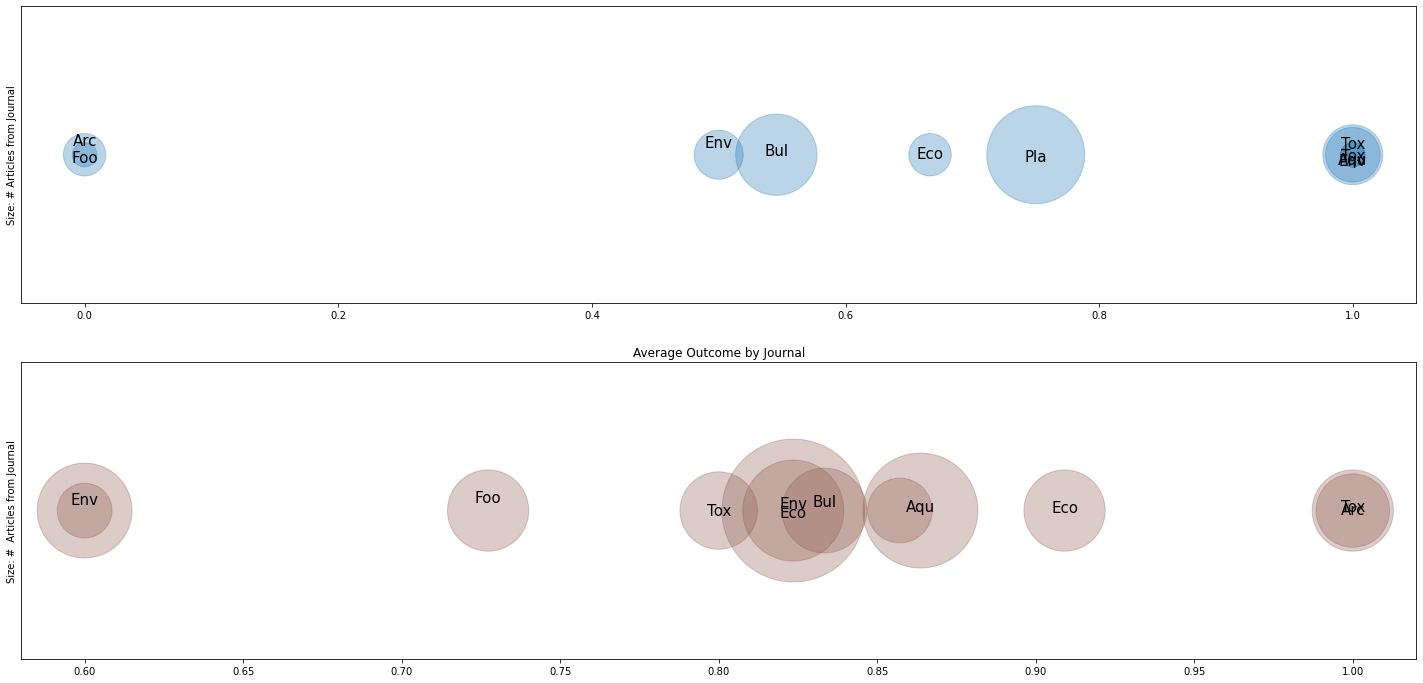

In [7]:
### Kodjo develop this to include data before and after 2010 differentiated by color... 09232021 #####

fig, ax = plt.subplots(2, figsize=(25, 12))

plt.title("Average Outcome by Journal")

ax[0].set_ylabel('Size: # Articles from Journal')
ax[0].set_yticks([])
ax[0].scatter(x = outcomes_by_journal_before_2010["General_outcome"], 
           y = [0] * len(outcomes_by_journal_before_2010.index), 
           s = outcomes_by_journal_before_2010["num_obs"]*600, 
           color = "C0", 
           alpha = .3)
ax[1].set_ylabel('Size: #  Articles from Journal')
ax[1].set_yticks([])
ax[1].scatter(x = outcomes_by_journal_after_2010["General_outcome"], 
           y = [0] * len(outcomes_by_journal_after_2010.index), 
           s = outcomes_by_journal_after_2010["num_obs"]*600, 
           color = "C5", 
           alpha = .3)

index= list(outcomes_by_journal_after_2010.sort_values("num_obs", ascending = False).index)
index = index[:10]
for ix in index:
    ax[1].text(outcomes_by_journal_after_2010["General_outcome"].loc[ix],-.004 + random.random()* 0.008,ix[:3], 
            ha="center", fontsize = 15)

index= list(outcomes_by_journal_before_2010.sort_values("num_obs", ascending = False).index)
index = index[:10]
for ix in index:
    ax[0].text(outcomes_by_journal_before_2010["General_outcome"].loc[ix],-.004 + random.random()* 0.008,ix[:3], 
            ha="center", fontsize = 15)    

In [8]:
# show results by country
outcomes_by_country = data.groupby("Loc_experiment").mean()[["General_outcome"]]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()
outcomes_by_country.sort_values("num_obs", ascending = False)
top_countries = outcomes_by_country.sort_values("num_obs", ascending = False).index
top_countries

Index(['BRAZIL', 'ARGENTINA', 'USA', 'CANADA', 'FRANCE', 'CHINA', 'POLAND',
       'ITALY', 'GERMANY', 'INDIA', 'NIGERIA', 'TURKEY', 'COLOMBIA', 'DENMARK',
       'AUSTRALIA', 'PORTUGAL', 'SPAIN', 'SWITZERLAND', 'UK', 'IRAN', 'MEXICO',
       'EGYPT', 'FINLAND', 'AUSTRIA', 'BELGIUM', 'CROATIA', 'HUNGARY',
       'SOUTH AFRICA', 'SWEDEN', 'SERBIA', 'GREECE', 'SRI LANKA', 'JAPAN',
       'MOROCCO', 'LATVIA', 'IRAQ', 'BRAZL', 'UK & USA', 'TUNISIA', 'THAILAND',
       'TAIWAN', 'UKRAINE', 'CANADA & USA', 'CAMEROON', 'IRELAND', 'SLOVENIA',
       'ITALY & NETHERLANDS', 'ROMANIA', 'REPUBLIC OF KOREA', 'ECUADOR',
       'NORWAY', 'NEW ZEALAND', 'NETHERLANDS', 'BELGIUM & GERMANY',
       'SLOVAK REPUBLIC'],
      dtype='object', name='Loc_experiment')

In [9]:
countries = list(top_countries[0:10])
top_country_data = data[data["Loc_experiment"].isin(countries)]
before_2010_data = top_country_data[top_country_data["Year"] < 2010]

before_2010_data

,Unnamed: 0,Article_title,Article_link,General_outcome,"General_outcome (1,0)",Desc_general_outcome,Daily_intake,Descr_daily_intake,Health_outcome,Descr_health_outcome,Environmental_outcome,Descr_environmental_outcome,Fund_source,Fund_Source,University,Private,Private & Public,Private & University,Public,Public & International Org,Public & University,University & International Org,International Org,Research Institution,Not Available,Institution,Author_affiliation,Loc_authors,Loc_experiment,Year,Journal,Loc_journal,Loc_editor_journal,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,International,Research,SWEDEN,IRELAND,SRI LANKA,ARGENTINA,AUSTRIA,TUNISIA,HUNGARY,LATVIA,TURKEY,AUSTRALIA,UKRAINE,BRAZL,USA,SERBIA,SWITZERLAND,CANADA,FINLAND,FRANCE,INDIA,SLOVENIA,NETHERLANDS,EGYPT,BELGIUM,SPAIN,NIGERIA,NEW ZEALAND,MEXICO,MOROCCO,DENMARK,POLAND,CHINA,COLOMBIA,PORTUGAL,SOUTH AFRICA,BRAZIL,ITALY,CAMEROON,GREECE,NORWAY,ROMANIA,THAILAND,UK,GERMANY,SLOVAK REPUBLIC,IRAN,REPUBLIC OF KOREA,JAPAN,TAIWAN,IRAQ,CROATIA,ECUADOR,1987,1989,1990,1991,1993,1994,1995,1997,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,83,As the Worm Turns: Eisenia fetida Avoids Soil ...,https://link.springer.com/article/10.1007%2Fs0...,0,0,No effect on earthworm living in glyphosate ba...,NaN,NaN,0,NaN,0,No effect on earthworm living in glyphosate ba...,NONE,None,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,University,Washington State University,USA,USA,2003,Bulletin of Environmental Contamination and To...,GERMANY,CANADA,1.785,0.636,34.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,91,Quality of cotton seeds from plants treated wi...,https://www.scielo.br/scielo.php?script=sci_ar...,0,0,No difference in seed quality,NaN,NaN,0,NaN,0,No significant difference in plantule emergenc...,NONE,None,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,University,University of Mato Grosso,BRAZIL,BRAZIL,2006,Planta Daninha,BRAZIL,BRAZIL,0.357,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,135,Drift simulation of glyphosate commercial form...,https://www.scielo.br/scielo.php?script=sci_ar...,1,1,"The simulated drift glyphosate, regardless of ...",NaN,NaN,0,NaN,1,"The simulated drift glyphosate, regardless of ...",NONE,None,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,University,Federal Technological University of Paraná,BRAZIL,BRAZIL,2008,Planta Daninha,BRAZIL,BRAZIL,0.357,0.688,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17,138,Response of beet ( Beta vulgaris ) and carrot ...,https://www.scielo.br/scielo.php?script=sci_ar...,1,1,Reduced doses of the herbicide glyphosate nega...,NaN,NaN,0,NaN,1,Reduced doses of the herbicide glyphosate nega...,NONE,None,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,University,Universidade Federal Rural do Rio Grande do Su...,BRAZIL,BRAZIL,2008,Planta Daninha,BRAZIL,BRAZIL,0.357,0.688,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20,143,Influence of glyphosate application on coconut...,https://doi.org/10.1590/S0100-83582009000200017,0,0,It is concluded that the use of the herbicide ...,NaN,NaN,0,NaN,0,It is concluded that the use of the herbicide ...,NONE,None,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1.0,University,Federal University of Santa Maria,BRAZIL,BRAZIL,2009,Planta Daninha,BRAZIL,BRAZIL,0.357,1.259,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
38,207,Acute effects of glyphosa

In [10]:
top_country_data["Loc_experiment"]

0          ITALY
1            USA
4         CANADA
8         BRAZIL
9            USA
10        BRAZIL
11        BRAZIL
12       GERMANY
14           USA
15        BRAZIL
16         CHINA
17        BRAZIL
20        BRAZIL
21           USA
25     ARGENTINA
26        CANADA
30         ITALY
31       GERMANY
32        POLAND
33         ITALY
35        BRAZIL
37        BRAZIL
38        BRAZIL
39       GERMANY
42       GERMANY
43         INDIA
45        BRAZIL
46           USA
47     ARGENTINA
50        BRAZIL
51       GERMANY
53         ITALY
54           USA
56         ITALY
61       GERMANY
62       GERMANY
63       GERMANY
64           USA
65           USA
67     ARGENTINA
68     ARGENTINA
69     ARGENTINA
70           USA
71         INDIA
72           USA
75           USA
76        POLAND
79        FRANCE
82        BRAZIL
83         ITALY
84        CANADA
85         ITALY
86       GERMANY
87        FRANCE
88        FRANCE
90           USA
91           USA
93           USA
96        BRAZ

In [11]:
before_2010_data["Loc_experiment"]

9            USA
10        BRAZIL
15        BRAZIL
17        BRAZIL
20        BRAZIL
38        BRAZIL
67     ARGENTINA
68     ARGENTINA
70           USA
75           USA
76        POLAND
82        BRAZIL
84        CANADA
91           USA
96        BRAZIL
100       CANADA
105       CANADA
106          USA
108       FRANCE
109       BRAZIL
113       BRAZIL
114       BRAZIL
115       BRAZIL
117       BRAZIL
118       BRAZIL
127       FRANCE
128          USA
129          USA
138          USA
139          USA
141          USA
147       CANADA
150          USA
151          USA
158       BRAZIL
163       CANADA
164          USA
167          USA
169          USA
176          USA
180       CANADA
190       FRANCE
191       BRAZIL
196       BRAZIL
200       BRAZIL
205       BRAZIL
207    ARGENTINA
214       FRANCE
236          USA
238          USA
259       BRAZIL
262          USA
299       BRAZIL
345       CANADA
354       BRAZIL
357       FRANCE
360        INDIA
371        CHINA
381       FRAN

In [12]:
country_before_2010 = before_2010_data.groupby("Loc_experiment").mean()[["General_outcome"]]
country_before_2010["num_obs"] = before_2010_data["Loc_experiment"].value_counts()
country_before_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
BRAZIL,0.791667,24
USA,0.250000,20
ARGENTINA,0.800000,10
CANADA,0.375000,8
FRANCE,0.714286,7
CHINA,1.000000,1
INDIA,1.000000,1
POLAND,0.000000,1


In [13]:
country_before_2010

,General_outcome,num_obs
Loc_experiment,,
ARGENTINA,0.800000,10
BRAZIL,0.791667,24
CANADA,0.375000,8
CHINA,1.000000,1
FRANCE,0.714286,7
INDIA,1.000000,1
POLAND,0.000000,1
USA,0.250000,20


In [14]:
after_2010_data = top_country_data[top_country_data["Year"] >= 2010]

country_after_2010 = after_2010_data.groupby("Loc_experiment").mean()[["General_outcome"]]
country_after_2010["num_obs"] = data_after_2010["Loc_experiment"].value_counts()
country_after_2010.sort_values("num_obs", ascending = False)

,General_outcome,num_obs
Loc_experiment,,
BRAZIL,0.807692,40.0
ARGENTINA,0.898551,33.0
USA,0.697674,16.0
CANADA,0.454545,13.0
POLAND,0.750000,11.0
CHINA,0.857143,9.0
FRANCE,0.941176,9.0
INDIA,0.888889,3.0
ITALY,0.750000,2.0


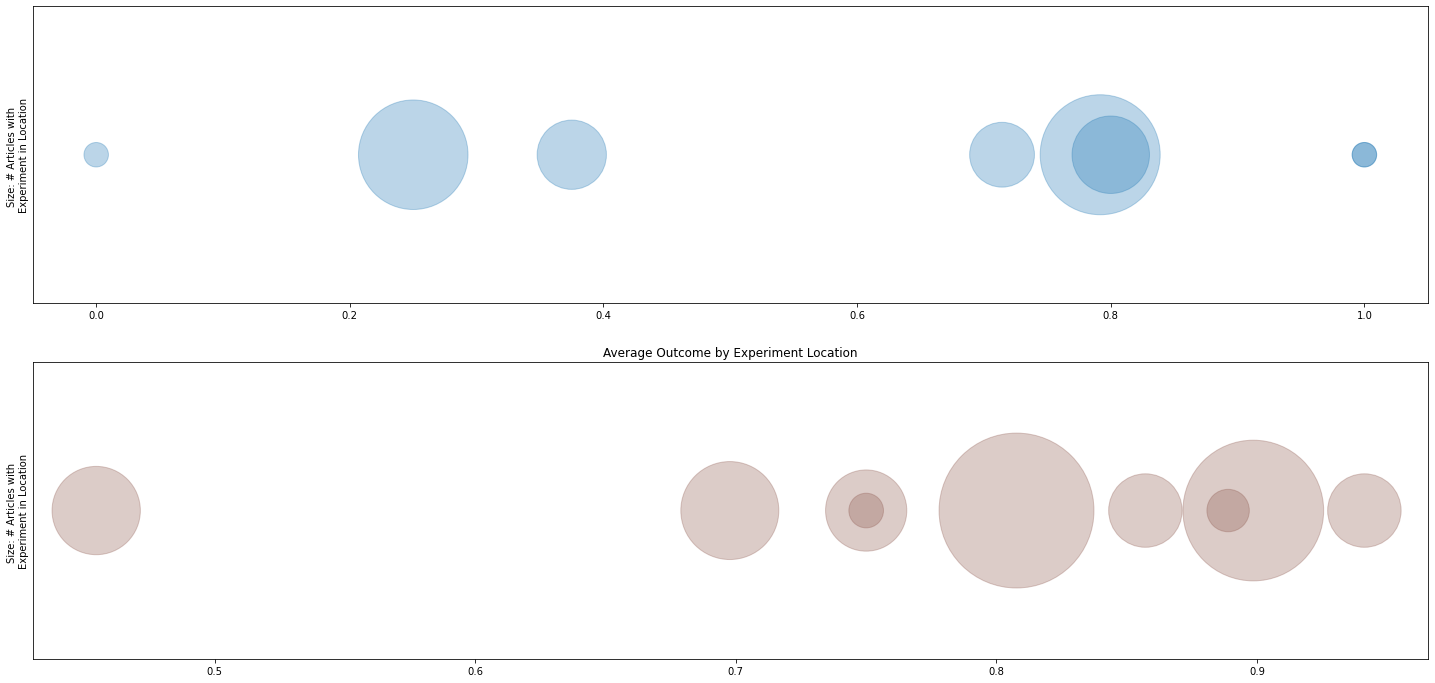

In [15]:
import random

fig, ax = plt.subplots(2, figsize=(25, 12))

plt.title("Average Outcome by Experiment Location")

ax[0].set_ylabel('Size: # Articles with \nExperiment in Location')
ax[0].set_yticks([])
ax[0].scatter(x = country_before_2010["General_outcome"], 
           y = [0] * len(country_before_2010.index), 
           s = country_before_2010["num_obs"]*600, 
           color = "C0", 
           alpha = .3)
ax[1].set_ylabel('Size: # Articles with \nExperiment in Location')
ax[1].set_yticks([])
ax[1].scatter(x = country_after_2010["General_outcome"], 
           y = [0] * len(country_after_2010.index), 
           s = country_after_2010["num_obs"]*600, 
           color = "C5", 
           alpha = .3)

In [16]:
## Create indicator variables to represent funding source location
funding_sources = ["Public", "Private", "University", "International", "Research"]
data["Fund_Source"].fillna("", inplace = True)
data["Fund_Source"] = data["Fund_Source"].str.title()
for source in funding_sources:
    data[source] = 0
    data[source][data["Fund_Source"].str.contains(source)]=1
data[["Fund_Source"]+funding_sources]

<ipython-input-16-dba50e5d6eac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Fund_Source"].str.contains(source)]=1


,Fund_Source,Public,Private,University,International,Research
0,International Org,0,0,0,1,0
1,International Org,0,0,0,1,0
2,International Org,0,0,0,1,0
3,International Org,0,0,0,1,0
4,International Org,0,0,0,1,0
5,International Org,0,0,0,1,0
6,International Org,0,0,0,1,0
7,International Org,0,0,0,1,0
8,None,0,0,0,0,0
9,None,0,0,0,0,0


In [17]:
### Kodjo develop this... 09232021 #####
## code for counting projects and calculating average outcome by funding source type
funding_sources = ["Public",
                   "Private",
                   "University",
                   "International",
                   "Research"]

for key in funding_sources:
    print(key, data[key].sum(), data[data[key] == 1]["General_outcome"].mean())


Public 309 0.7766990291262136
Private 51 0.6078431372549019
University 124 0.8064516129032258
International 14 0.6428571428571429
Research 0 nan


Text(0.5, 1.0, 'Average Outcome by Funding Source')

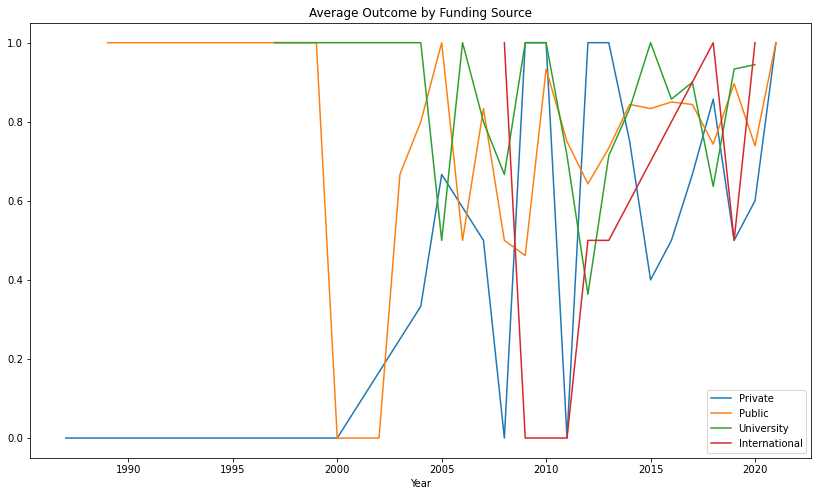

In [18]:
fig, ax = plt.subplots(figsize = (14,8))
data[data["Private"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Private")
data[data["Public"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Public")
data[data["University"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "University")
data[data["International"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "International")
plt.legend()
ax.set_title("Average Outcome by Funding Source")

In [19]:
Author_affiliation = ["Public", "Private", "University", "International", "Research"]
data["Institution"].fillna("", inplace = True)
data["Institution"] = data["Institution"].str.title()
for source in Author_affiliation:
    data[source] = 0
    data[source][data["Institution"].str.contains(source)]=1
data[["Institution"]+Author_affiliation]

<ipython-input-19-99174c72e075>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Institution"].str.contains(source)]=1


,Institution,Public,Private,University,International,Research
0,International Org,0,0,0,1,0
1,Private & University,0,1,1,0,0
2,University,0,0,1,0,0
3,Public & University,1,0,1,0,0
4,Public & University,1,0,1,0,0
5,Private,0,1,0,0,0
6,Public & University,1,0,1,0,0
7,University & International Org,0,0,1,1,0
8,University,0,0,1,0,0
9,University,0,0,1,0,0


In [20]:
Author_affiliation = ["Public",
                   "Private",
                   "University",
                   "International",
                   "Research"]

for key in Author_affiliation:
    print(key, data[key].sum(), data[data[key] == 1]["General_outcome"].mean())


Public 101 0.6435643564356436
Private 25 0.32
University 442 0.755656108597285
International 2 0.5
Research 0 nan


Text(0.5, 1.0, 'Average Outcome by Author Affiliation')

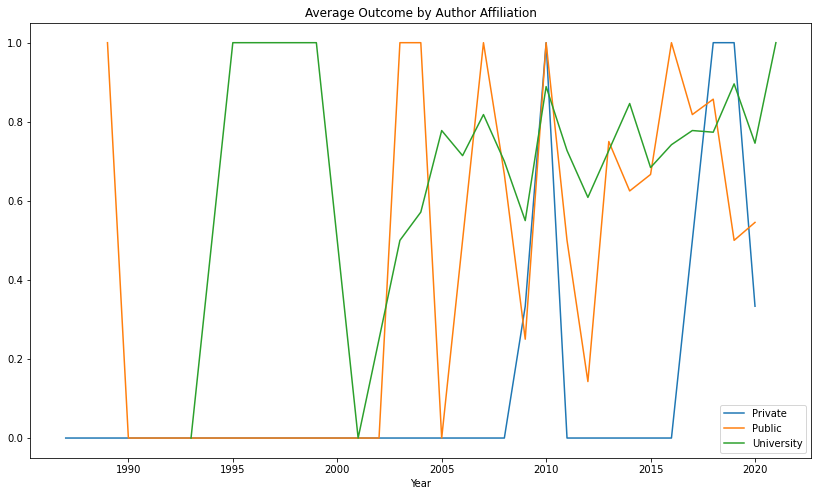

In [21]:
fig, ax = plt.subplots(figsize = (14,8))
data[data["Private"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Private")
data[data["Public"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Public")
data[data["University"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "University")
plt.legend()
ax.set_title("Average Outcome by Author Affiliation")

In [68]:
outcomes_by_journal = data.groupby("Journal").mean()[["General_outcome"]]
outcomes_by_journal["Impact_F_Publishing_Year"] = data["Journal"].sort_values()
outcomes_by_journal.sort_values("Impact_F_Publishing_Year", ascending = False)

,General_outcome,Impact_F_Publishing_Year
Journal,,
3Biotech,1.000000,NaN
Acta Agrobotanica,1.000000,NaN
Acta Scientiarum. Agronomy,1.000000,NaN
Aeolian Research,1.000000,NaN
"Agriculture, Ecosystems & Environment",1.000000,NaN
Agronomy,0.000000,NaN
Anais Da Academia Brasileira De Ciencias,1.000000,NaN
Analytical and Bioanalytical Chemistry,0.000000,NaN
Annals of Tropical Medicine and Health,1.000000,NaN
